## Introduction to SciKitLearn

This notebook demonstrates some of the most useful functions of scikitlearn

### Topics Covered
1. end-to-end scikit learn workflow
2. prepare the data
3. fit the model and make predictions
4. evaluate the model
5. improve the model
6. save and load a trained model
7. put it all together

## E2E Workflow

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('numpy-images/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


create features (x matrix)

In [3]:
features = df.drop("target", axis=1)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


create labels (y)

In [4]:
label = df['target']
label

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

we are classifying if a patient has heart disease, so we'll be using a classification model


**a great article on random forest classification**\
https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [9]:
# keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

fit the model to the training data

In [ ]:
# import library

In [6]:
from sklearn.model_selection import train_test_split as tts

data needs to be split into training and testing data

In [7]:
x_train, x_test, y_train, y_test = tts(features, label, test_size =.20)

In [8]:
clf.fit(x_train, y_train);

make a prediction

In [9]:
ypreds = clf.predict(x_test)
ypreds

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

evaluate model on training and test data

**Signature:** clf.score(X, y, sample_weight=None)\
**Docstring:** \
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

In [10]:
clf.score(x_train, y_train)

1.0

In [11]:
clf.score(x_test, y_test)

0.8032786885245902

## more metrics 

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
print(classification_report(y_test, ypreds))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.72      0.88      0.79        26

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [14]:
confusion_matrix(y_test, ypreds)

array([[26,  9],
       [ 3, 23]], dtype=int64)

In [15]:
accuracy_score(y_test, ypreds)

0.8032786885245902

improve model

In [16]:
# try different amount of n-estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

    

Trying model with 10 estimators
Model accuracy on test set: 77.05%

Trying model with 20 estimators
Model accuracy on test set: 78.69%

Trying model with 30 estimators
Model accuracy on test set: 81.97%

Trying model with 40 estimators
Model accuracy on test set: 80.33%

Trying model with 50 estimators
Model accuracy on test set: 81.97%

Trying model with 60 estimators
Model accuracy on test set: 80.33%

Trying model with 70 estimators
Model accuracy on test set: 81.97%

Trying model with 80 estimators
Model accuracy on test set: 83.61%

Trying model with 90 estimators
Model accuracy on test set: 81.97%



save the model and load it

In [38]:
import pickle as pkl

pkl.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [39]:
loaded_model = pkl.load(open("random_forest_model_1.pkl", "rb"))

In [41]:
loaded_model.score(x_test, y_test)

0.8032786885245902

---

## 1.Getting Data Prepared for Machine Learning
Three main tasks:
1. splitting the data into features and labels (typically called 'X' and 'Y')
2. filling (aka imputing) or disregarding missing values
3. converting non-numerical values to numerical (feature engineering)

In [42]:
#show data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = df.drop("target", axis=1)
Y = df["target"]

In [18]:
x_train, x_test, y_train, y_test = tts(X, Y, test_size =.20)

## Make sure all data is numerical

In [20]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.describe()

,Odometer (KM),Doors,Price
count,1000.000000,1000.000000,1000.000000
mean,131073.708000,4.014000,16045.665000
std,68859.723885,0.379405,8630.794219
min,10148.000000,3.000000,2796.000000
25%,71238.000000,4.000000,9481.500000
50%,131202.000000,4.000000,14264.000000
75%,192372.750000,4.000000,20738.750000
max,249860.000000,5.000000,52458.000000


In [21]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
len(car_sales)

1000

In [23]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
# split into x, y

X = car_sales.drop("Price", axis=1)
Y = car_sales["Price"]

In [26]:
#split into training and test data
x_train, x_test, y_train, y_test = tts(X, Y, test_size=.20)

In [27]:
# BUild ML Model
from sklearn.ensemble import RandomForestRegressor

In [28]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

# this will result in error because of the strings

ValueError: could not convert string to float: 'Toyota'

In [33]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer as cf

categorical_features = ["Make", "Colour", "Doors"]
oh = ohe()
transformer = cf([("one_hot", 
                   oh,
                   categorical_features)],
                   remainder="passthrough")

transformed_x = transformer.fit_transform(X)
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [34]:
# same using pandas

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [35]:
# refit the model

np.random.seed(42)
X_train, X_test, Y_train, Y_test = tts(transformed_x, Y, test_size = .20)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [36]:
model.score(X_test, Y_test)

0.3235867221569877

In [37]:
## handle missing data (scikitlearn handles this)

car_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_missing.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0


In [ ]:
#check how many missing values for each column

In [39]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# create X and Y

X = car_missing.drop("Price", axis=1)
Y = car_missing["Price"]

In [43]:
X.head(2)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0


In [44]:
Y.head(2)

0    15323.0
1    19943.0
Name: Price, dtype: float64

In [46]:
# convert data into numbers

categorical_features = ["Make", "Colour", "Doors"]
oh = ohe()
transformer = cf([("one_hot", 
                   oh,
                   categorical_features)],
                   remainder="passthrough")

transformed_x = transformer.fit_transform(X)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [47]:
# account for missing values

car_missing["Make"].fillna("missing", inplace=True)
car_missing["Colour"].fillna("missing", inplace=True)
car_missing["Odometer (KM)"].fillna(car_missing["Odometer (KM)"].mean(), inplace=True)
car_missing["Doors"].fillna(4, inplace=True)

In [48]:
car_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [50]:
# remove missing values from label

car_missing.dropna(inplace=True)
car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [52]:
# re-split data
X = car_missing.drop("Price", axis=1)
Y = car_missing["Price"]

In [54]:
categorical_features = ["Make", "Colour", "Doors"]
oh = ohe()
transformer = cf([("one_hot", 
                   oh,
                   categorical_features)],
                   remainder="passthrough")

transformed_x = transformer.fit_transform(car_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [56]:
X.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [58]:
# fill missing values with skleran
from sklearn.impute import SimpleImputer as si
from sklearn.compose import ColumnTransformer as ct

cat_imputer = si(strategy="constant", fill_value="missing")
door_imputer = si(strategy="constant", fill_value=4)
num_imputer = si(strategy="mean")

# define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer
imputer = ct([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# transform the data

filled_x = imputer.fit_transform(X)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

## Choosing the right estimator/algorithm for your problem

some things to note:

- scikit learen refers to machine learning models/algs as 'estimators'
- classification is prediciting a category (will or wont)
- regression is predicting a number (price or percentage)

use the following link to help choose a model:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [6]:
# get California housing data set 

from sklearn.datasets import fetch_california_housing as ca
housing = ca()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [9]:
# turn to DataFrame 
# use the 'data' column of the housing array
# use the features as column headers
import pandas as pd

df = pd.DataFrame(housing['data'], columns= housing['feature_names'])
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [10]:
df.size

165120

In [11]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [13]:
# add a column for house value

In [14]:
df['MedHouseVal'] = housing['target']
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [15]:
import numpy as np

In [20]:
# will use this data to create a ML model to predict housing cost

# import alg
from sklearn import linear_model as lm
model = lm.Ridge()

# setup random seed
np.random.seed(42)

# split data
from sklearn.model_selection import train_test_split as tts
X = df.drop('MedHouseVal', axis = 1) #features
y = df['MedHouseVal']  # label

X_train,X_test, y_train, y_test = tts(X,y,test_size=.20)

# instantiate and fit the model on training set
model.fit(X_train, y_train)

# check the score of the model on against the test set
# Signature: model.score(X, y, sample_weight=None)
# Docstring:
# Return the coefficient of determination of the prediction.
model.score(X_test, y_test)

0.5758549611440127

In [25]:
# try another model to improve score

# import alg
from sklearn import svm
model = svm.SVR() #Support Vector Regression

# setup random seed
np.random.seed(42)

# split data
from sklearn.model_selection import train_test_split as tts
X = df.drop('MedHouseVal', axis = 1) #features
y = df['MedHouseVal']  # label


X_train,X_test, y_train, y_test = tts(X,y,test_size=.20)

# instantiate and fit the model on training set
model.fit(X_train, y_train)


# score the data
model.score(X_test, y_test)


-0.016485360107173275

In [26]:
# so that didn't work at all. I should try an ensemble model

from sklearn.ensemble import RandomForestRegressor as rfr
model = rfr()


# setup random seed
np.random.seed(42)

# split data
from sklearn.model_selection import train_test_split as tts
X = df.drop('MedHouseVal', axis = 1) #features
y = df['MedHouseVal']  # label


X_train,X_test, y_train, y_test = tts(X,y,test_size=.20)

# instantiate and fit the model on training set
model.fit(X_train, y_train)


# score the data
model.score(X_test, y_test)

0.8059837014172988

In [27]:
# no instructor I will try to use a sample data set to make a classification model

In [12]:
import pandas as pd

In [9]:
# import data
from sklearn.datasets import load_iris
data = load_iris()

In [10]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y= pd.DataFrame(data['target'])
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [164]:
X.shape

(150, 4)

In [165]:
y.shape

(150, 1)

In [25]:
from sklearn.linear_model import SGDClassifier as sdg
clf = sdg(loss="hinge", penalty="l2", max_iter=150)

# setup random seed
np.random.seed(32)


# split the data
X_train,X_test, y_train, y_test = tts(X.values,y.values.ravel(),test_size=.20)

# instantiate and fit the model on training set
clf.fit(X_train, y_train)


SGDClassifier(max_iter=150)

In [177]:
clf.score(X_test, y_test)

0.8666666666666667

In [5]:
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split as tts

In [15]:
from sklearn.ensemble import RandomForestClassifier as RFC


# setup random seed
np.random.seed(32)


# split the data
X_train,X_test, y_train, y_test = tts(X.values,y.values.ravel(),test_size=.20)

# instantiate and fit the model on training set
clf = RFC()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
clf.score(X_test, y_test)

0.9666666666666667

## Make predictions with model

In [17]:
y_preds=clf.predict(X_test)
np.mean(y_preds == y_test)

0.9666666666666667

## classification model on real data set 
- using predict_proba() returns probabilites of a classification label

In [22]:
clf.predict_proba(X_test[:5])

array([[0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.92, 0.07],
       [0.  , 0.55, 0.45]])

In [24]:
# oredict on the same data
clf.predict(X_test[:5])

array([1, 0, 0, 1, 1])

### my understanding

predict proba is prediciting the probabilty that the given data is a certain classification. 
'target_names': array(['setosa', 'versicolor', 'virginica'], so in element 0 of the array
model is certain the sample is versicolor while in element 4 it is a bit torn between versicolor
and virginica

## Predictions on a regression model

In [27]:
# Resources

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_diabetes as ld
from sklearn.ensemble import RandomForestRegressor as rfr

In [28]:
# create data
raw_data = ld()
raw_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [31]:
# transform data to DataFrame
df = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930


In [32]:
# add the labels
df['target'] = raw_data['target']
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [33]:
# check the data
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [35]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [36]:
df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [37]:
# create the data
X = df.drop("target", axis=1)
y = df['target']

In [38]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [39]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [40]:
# split the data

X_train, X_test, y_train, y_test = tts(X,y,test_size=.2)

In [48]:
# create the model instance
model = rfr(n_estimators=500)

# fit the model
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

In [49]:
y_preds[:10]

array([172.986, 290.06 , 185.108,  92.852, 168.604,  88.922, 187.794,
       100.306,  73.652, 240.014])

In [50]:
np.array(y_test[:10])

array([189., 263., 225.,  74., 200., 168., 217.,  64.,  48., 310.])

In [51]:
# compare predictions from the truth
from sklearn.metrics import mean_absolute_error as mae
mae(y_preds, y_test)

44.40119101123596

In [52]:
# on average my model is 44.40 different than the truth

## Evaluating a ML model

three in-built ways of evaluating model

1. estimators built in `score()` method
2. the scoring parameter
3. problem-specific metric functions

https://scikit-learn.org/stable/modules/model_evaluation.html

will use heart disease data

In [75]:
from sklearn.ensemble import RandomForestClassifier as rfc

heart_disease_data = pd.read_csv("numpy-images/heart-disease.csv")
heart_disease_data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [76]:
# create the data
X = heart_disease_data.drop("target", axis=1)
y =heart_disease_data["target"]

In [77]:
# split data
from sklearn.model_selection import train_test_split as tts

X_train,X_test,y_train,y_test = tts(X,y, test_size=.2)

In [81]:
# normalize data

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_train)

In [83]:
X_train_norm = transformer.transform(X_train)

In [84]:
transformer = Normalizer().fit(X_test)
X_test_norm = transformer.transform(X_test)

In [88]:
X_train_norm.size

3146

In [87]:
X_test_norm.size

793

In [100]:
# instantiate model
clf = rfc()
clf.fit(X_train_norm, y_train)

RandomForestClassifier()

In [102]:
clf.score(X_test_norm, y_test)

0.8852459016393442

## Evaluating a model using the scoring parameter

In [104]:
from sklearn.model_selection import cross_val_score as cvs

cvs(clf,X,y)

array([0.83606557, 0.90163934, 0.81967213, 0.83333333, 0.81666667])

In [108]:
np.random.seed(42)

clf_single_score = clf.score(X_test_norm, y_test)

clf_x_val_score_mean = np.mean(cvs(clf,X,y))

clf_single_score, clf_x_val_score_mean

(0.8852459016393442, 0.8248087431693989)

In [109]:
# by default scoring param is set to none

## Classification evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

In [120]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rfc

np.random.seed(42)
heart_disease_data = pd.read_csv("numpy-images/heart-disease.csv")
X = heart_disease_data.drop("target", axis=1)
y =heart_disease_data["target"]

clf = rfc()
cvs(clf, X, y)


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [121]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cvs(clf, X, y))}")

Heart Disease Classifier Cross-Validated Accuracy: 0.8018032786885245


### area under the receiver operator characteristic
1. Area under curve (AUC)
2. ROC curve

comparison of a models true positive rate vs a models false positive rate

In [122]:
X_train,X_test, y_train, y_test = tts(X,y,test_size=.20)

In [124]:
from sklearn.metrics import roc_curve


clf.fit(X_train,y_train)
y_preds=clf.predict_proba(X_test)

y_preds[:10]

array([[0.03, 0.97],
       [0.5 , 0.5 ],
       [0.07, 0.93],
       [0.39, 0.61],
       [0.24, 0.76],
       [0.03, 0.97],
       [0.64, 0.36],
       [0.38, 0.62],
       [0.05, 0.95],
       [0.84, 0.16]])

In [125]:
y_preds_pos = y_preds[:, 1]
y_preds_pos[:10]

array([0.97, 0.5 , 0.93, 0.61, 0.76, 0.97, 0.36, 0.62, 0.95, 0.16])

In [126]:
# calculate fpr, tpr, and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_preds_pos)

#check false positive rate
fpr

array([0.     , 0.     , 0.     , 0.03125, 0.03125, 0.03125, 0.0625 ,
       0.0625 , 0.09375, 0.09375, 0.125  , 0.125  , 0.125  , 0.1875 ,
       0.21875, 0.21875, 0.21875, 0.25   , 0.3125 , 0.3125 , 0.46875,
       0.53125, 0.59375, 0.625  , 0.71875, 0.78125, 0.875  , 1.     ])

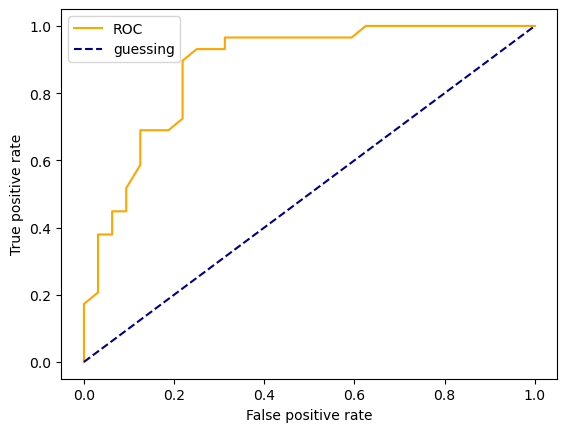

In [128]:
# create a function for plotting roc curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plots a roc curve given the fpr and tpr
    """
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #plot line with no predictive power
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="guessing")
    
    #customize plot
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend()
    plt.show();
    
plot_roc_curve(fpr,tpr)

In [129]:
from sklearn.metrics import roc_auc_score as ras

ras(y_test,y_preds_pos)

0.8782327586206897

### confusion matrix

a confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea where the model is getting confused

In [131]:
from sklearn.metrics import confusion_matrix 

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  8],
       [ 2, 27]], dtype=int64)

In [132]:
# visualize matrix with crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,8
1,2,27


In [133]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aburn\OneDrive\Desktop\ML-DS-Proj\sampleProj1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2023.5.7           |  py311haa95532_0         154 KB
    seaborn-0.12.2             |  py311haa95532_0         583 KB
    ------------------------------------------------------------
                                           Total:         737 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.2-py311haa95532_0 

The following packages will be UPDATED:

  certifi                         2022.12.7-py311haa95532_0 --> 2023.5.7-py311haa95532_0 




seaborn-0.12.2       | 583 KB    |            |   0% 

certifi-2023.5.7     | 154 KB    |            |   0% 
seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1




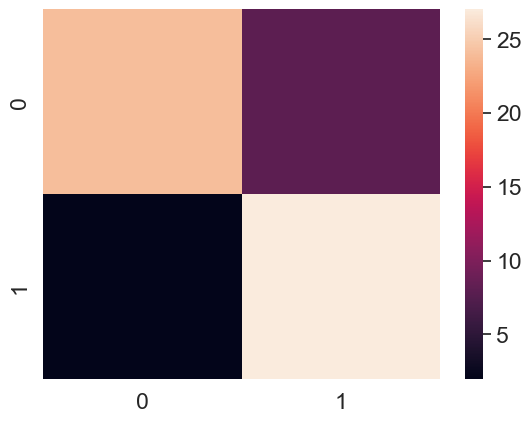

In [135]:
# make confusion matrix morevisual with a heatmap

import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat);

### creating a confusion matrix using scikit learn

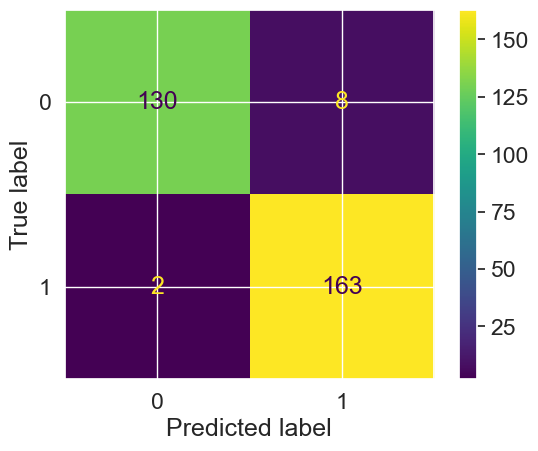

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(estimator=clf,X=X, y=y);

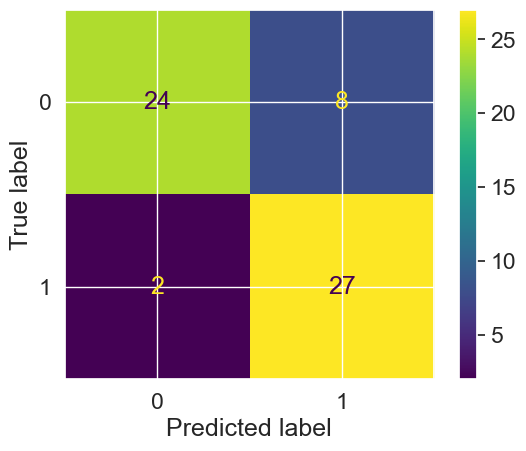

In [141]:
cmd.from_predictions(y_test, y_preds);

### classification report

In [144]:
from sklearn.metrics import classification_report as cr

print(cr(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.77      0.93      0.84        29

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



documentation on terms:\
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

to summarize...\
